Problem 3.1 
Use LDA without dimension reduction.

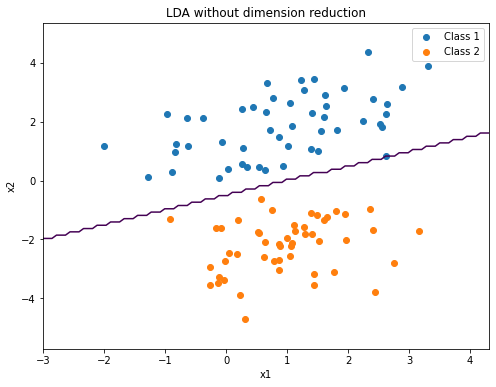

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Parameters
mu1 = np.array([1, 2])
mu2 = np.array([1, -2])
sigma = np.array([[1, 0.5], [0.5, 1]])
pi1 = pi2 = 0.5

# Generate data
np.random.seed(123)
x1 = np.random.multivariate_normal(mu1, sigma, size=50)
x2 = np.random.multivariate_normal(mu2, sigma, size=50)

# LDA classification rule
def lda_decision_rule(x):
    delta1 = np.dot(x, np.linalg.inv(sigma)).dot(mu1) - 0.5 * np.dot(mu1, np.linalg.inv(sigma)).dot(mu1) + np.log(pi1)
    delta2 = np.dot(x, np.linalg.inv(sigma)).dot(mu2) - 0.5 * np.dot(mu2, np.linalg.inv(sigma)).dot(mu2) + np.log(pi2)
    return 1 if delta1 > delta2 else -1

# Compute decision boundary
x_min, x_max = np.min(np.vstack((x1, x2)), axis=0) - 1, np.max(np.vstack((x1, x2)), axis=0) + 1
xx, yy = np.meshgrid(np.linspace(x_min[0], x_max[0], 100), np.linspace(x_min[1], x_max[1], 100))
Z = np.array([lda_decision_rule(np.array([xi, yi])) for xi, yi in np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)

# Plot data and decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(x1[:, 0], x1[:, 1], label='Class 1')
plt.scatter(x2[:, 0], x2[:, 1], label='Class 2')
plt.contour(xx, yy, Z, levels=[0])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('LDA without dimension reduction')
plt.legend()
plt.show()


Problem 3.2 Use reduced rank LDA by projecting data to the direction of greatest centroid spread.

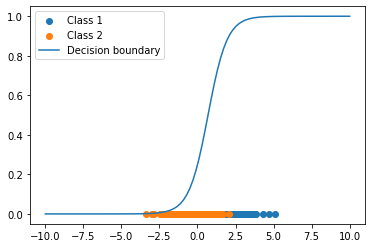

Equation of decision boundary:
X_lda * [[1.59679785]] + [-1.10805303] = 0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.linear_model import LogisticRegression

# Set random seed for reproducibility
np.random.seed(123)

# Define parameters for the problem
mu1 = np.array([1, 2])
mu2 = np.array([1, -2])
sigma = np.array([[1, 0.5], [0.5, 1]])
n1 = 100
n2 = 100

# Generate data for class 1 and class 2
X1 = np.random.multivariate_normal(mu1, sigma, n1)
X2 = np.random.multivariate_normal(mu2, sigma, n2)

# Concatenate the data and labels
X = np.concatenate((X1, X2))
y = np.concatenate((np.ones(n1), -np.ones(n2)))

# Calculate the pooled within-class scatter matrix
N = n1 + n2
S1 = S2 = (N - 1) * sigma
Sw = S1 + S2

# Calculate the eigenvectors and eigenvalues of the pooled within-class scatter matrix
eigvals, eigvecs = np.linalg.eig(Sw)

# Sort the eigenvectors in descending order of their corresponding eigenvalues
idx = eigvals.argsort()[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# Project the data onto the direction of greatest centroid spread
X_lda = X.dot(eigvecs[:, 0])

# Fit logistic regression model
clf = LogisticRegression(solver='liblinear')
clf.fit(X_lda.reshape(-1, 1), y)

# Plot decision boundary and data points
plt.scatter(X_lda[y==1], np.zeros_like(X_lda[y==1]), label='Class 1')
plt.scatter(X_lda[y==-1], np.zeros_like(X_lda[y==-1]), label='Class 2')
x_vals = np.linspace(-10, 10, 100)
y_vals = clf.predict_proba(x_vals.reshape(-1, 1))[:, 1]
plt.plot(x_vals, y_vals, label='Decision boundary')
plt.legend()
plt.show()

# Print equation of decision boundary
print('Equation of decision boundary:')
print(f'X_lda * {clf.coef_} + {clf.intercept_} = 0')


Problem 3.3 Use reduced rank LDA by projecting data to the discriminant direction.

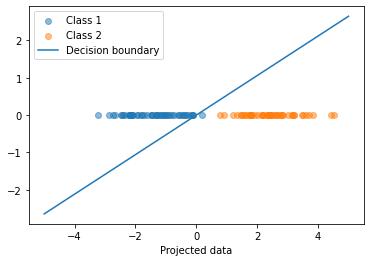

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.linear_model import LogisticRegression

# Set random seed for reproducibility
np.random.seed(123)

# Define parameters for the problem
mu1 = np.array([1, 2])
mu2 = np.array([1, -2])
sigma = np.array([[1, 0.5], [0.5, 1]])
n1 = n2 = 50

# Generate data for class 1
X1 = np.random.multivariate_normal(mu1, sigma, n1)

# Generate data for class 2
X2 = np.random.multivariate_normal(mu2, sigma, n2)

# Compute mean of each class
mean1 = np.mean(X1, axis=0)
mean2 = np.mean(X2, axis=0)

# Compute within-class scatter matrix
Sw = np.dot((X1 - mean1).T, (X1 - mean1)) + np.dot((X2 - mean2).T, (X2 - mean2))

# Compute between-class scatter matrix
Sb = np.outer((mean1 - mean2), (mean1 - mean2))

# Compute eigenvectors and eigenvalues of the generalized eigenvalue problem
alpha = 0.1
eigvals, eigvecs = np.linalg.eig(np.dot(np.linalg.inv(Sw + alpha*np.identity(2)), Sb))

# Find index of largest eigenvalue
max_idx = np.argmax(eigvals)

# Get eigenvector corresponding to largest eigenvalue
w = eigvecs[:, max_idx]

# Project data onto discriminant direction
X1_proj = np.dot(X1, w)
X2_proj = np.dot(X2, w)

# Fit logistic regression model on projected data
X_proj = np.concatenate([X1_proj, X2_proj])
y = np.concatenate([np.ones(n1), -np.ones(n2)])
clf = LogisticRegression(random_state=0).fit(X_proj.reshape(-1, 1), y)

# Compute decision boundary
w0 = clf.intercept_[0]
w1 = clf.coef_[0][0]
x = np.linspace(-5, 5, num=100)
y = -w0/w1 * x

# Plot data and decision boundary
plt.scatter(X1_proj, np.zeros(n1), label='Class 1', alpha=0.5)
plt.scatter(X2_proj, np.zeros(n2), label='Class 2', alpha=0.5)
plt.plot(x, y, label='Decision boundary')
plt.legend()
plt.xlabel('Projected data')
plt.show()
